In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings       #ใช้เลี่ยงการแจ้งเตือนที่ไม่จำเป็นออกไป (ตัวสีชมพูๆใต้โค้ด)
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


import pandas_datareader as pdr
import numpy as np
import datetime
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import mplfinance as mpf
#from mplfinance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc

stock = pdr.get_data_yahoo('ptt.BK', 
                          start=datetime.datetime(2018, 1, 1), 
                          end=datetime.datetime(2019, 12, 31))

C:\Users\KAKAREM\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':
C:\Users\KAKAREM\anaconda3\envs\tf2-gpu\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


0.0001205490
0.030137252916696403


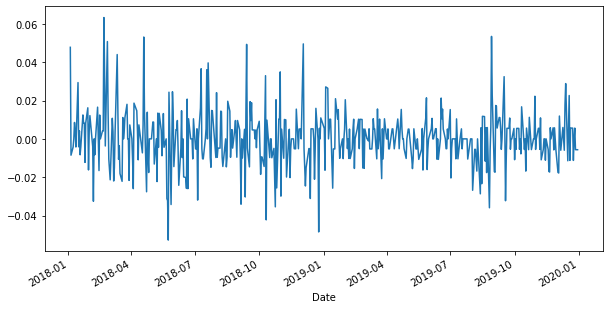

In [2]:
stock['log_return'] = np.log(stock['Adj Close'] / stock['Adj Close'].shift(1))  #formula_SimpleReturn
stock.to_csv (r'C:\Users\KAKAREM\Desktop\ptt.csv',index = False,  header=True)    #Save.csv(excel)

#print(COM7)
#print(COM7.index)     #ดูจำนวนวัน
#print(COM7.shape[0])  #check_theNumber_Column0
#print(COM7.tail())


# Plot Graph ดู
stock['log_return'].plot(figsize=(10,5))

# หาค่าเฉลี่ย #
log_return_d = stock['log_return'].mean()
print('%.10f'% log_return_d)  #ใช้ทศนิยม10ตำแหน่ง

# เอาค่าเฉลี่ยมาคูณ 250 วัน คือ จำนวนวันทั้งปี
log_return_a = log_return_d * 250
print(log_return_a)

# Logarithmic Rate Return ต่อ 1 ปี
#print (str(round(log_return_a * 100, 5)) + ' %')

In [3]:
warnings.filterwarnings('ignore')

In [4]:
stock

,High,Low,Open,Close,Volume,Adj Close,log_return
Date,,,,,,,
2018-01-03,45.000000,44.000000,44.200001,45.000000,81239000.0,40.366364,NaN
2018-01-04,47.200001,45.000000,45.200001,47.200001,124259000.0,42.339828,0.047731
2018-01-05,47.400002,46.400002,47.200001,46.799999,87860000.0,41.981014,-0.008511
2018-01-08,47.200001,46.599998,46.799999,46.599998,63976000.0,41.801609,-0.004283
2018-01-09,46.599998,46.599998,46.599998,46.599998,5658000.0,41.801609,0.000000
...,...,...,...,...,...,...,...
2019-12-24,45.000000,44.000000,45.000000,44.250000,32913200.0,43.055523,-0.011236
2019-12-25,44.250000,43.750000,44.250000,44.250000,11687500.0,43.055523,0.000000
2019-12-26,44.500000,44.250000,44.250000,44.500000,11117700.0,43.298771,0.005634


In [5]:
stock['Adj Close']

Date
2018-01-03    40.366364
2018-01-04    42.339828
2018-01-05    41.981014
2018-01-08    41.801609
2018-01-09    41.801609
                ...    
2019-12-24    43.055523
2019-12-25    43.055523
2019-12-26    43.298771
2019-12-27    43.055523
2019-12-30    42.812271
Name: Adj Close, Length: 489, dtype: float64

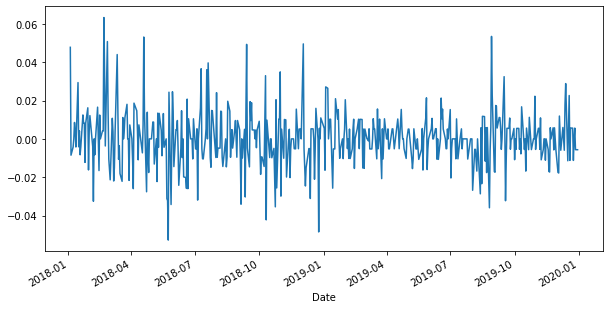

In [6]:
plt.figure(figsize=(10,5))
stock['log_return'].plot()
plt.show()

Text(0.5, 1.0, 'COM7 Cumulative Returns')

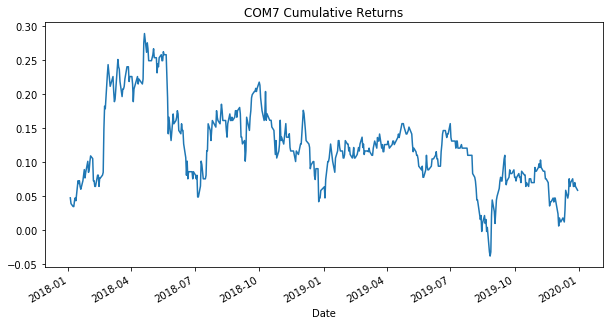

In [7]:
# Comulative Return
plt.figure(figsize=(10,5))
cum = stock['log_return'].cumsum()   #is used when we want to compute the cumulative sum of array elements over a given axis.
cum.plot()
plt.title('COM7 Cumulative Returns')

Text(0.5, 1.0, 'COM7 Autocorrelation plot')

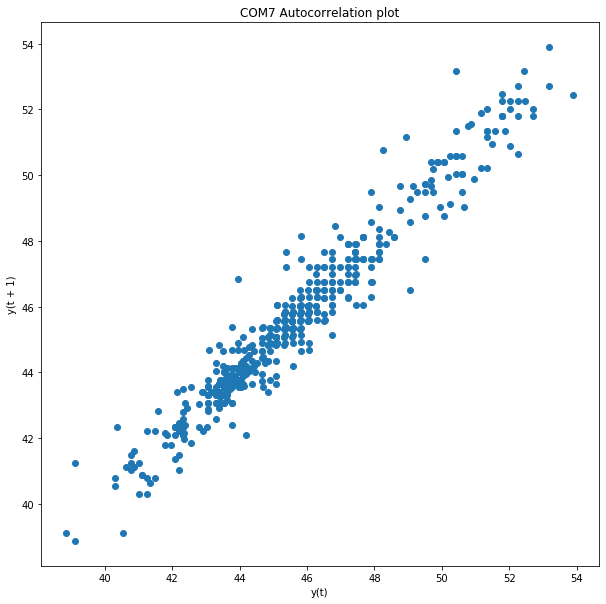

In [8]:
plt.figure(figsize=(10,10))
lag_plot(stock['Adj Close'], lag=1)  ###ยังไม่แน่ใจว่าต้องใช้ open มั้ย/lag ต้องใช้เท่าไหร่
plt.title('COM7 Autocorrelation plot')

In [9]:
print(stock.head())
print(stock.shape)
print(stock.columns)

                 High        Low       Open      Close       Volume  \
Date                                                                  
2018-01-03  45.000000  44.000000  44.200001  45.000000   81239000.0   
2018-01-04  47.200001  45.000000  45.200001  47.200001  124259000.0   
2018-01-05  47.400002  46.400002  47.200001  46.799999   87860000.0   
2018-01-08  47.200001  46.599998  46.799999  46.599998   63976000.0   
2018-01-09  46.599998  46.599998  46.599998  46.599998    5658000.0   

            Adj Close  log_return  
Date                               
2018-01-03  40.366364         NaN  
2018-01-04  42.339828    0.047731  
2018-01-05  41.981014   -0.008511  
2018-01-08  41.801609   -0.004283  
2018-01-09  41.801609    0.000000  
(489, 7)
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'log_return'], dtype='object')


In [10]:
stock.index

DatetimeIndex(['2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-15', '2018-01-16',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=489, freq=None)

In [11]:
stock.index[488]

Timestamp('2019-12-30 00:00:00')

       Date       open       high        low      close
0  736697.0  40.366364  42.339828  40.366364  42.160416
1  736707.0  43.416264  43.416264  42.878040  43.416264
2  736717.0  43.775074  44.672104  43.595669  44.672104
3  736727.0  45.030914  45.030914  43.057453  43.057453
4  736737.0  43.775074  46.824982  43.057453  46.824982


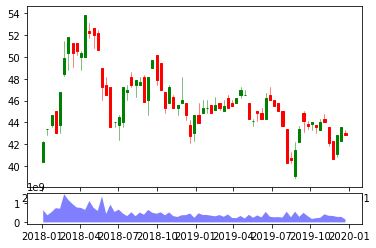

In [12]:
stock_ohlc= stock['Adj Close'].resample('10D').ohlc()
stock_volume= stock['Volume'].resample('10D').sum()
stock_ohlc.reset_index(inplace=True)
stock_ohlc['Date']= stock_ohlc['Date'].map(mdates.date2num)
print(stock_ohlc.head())

ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1, stock_ohlc.values,width=5,colorup='green')
ax2.fill_between(stock_volume.index.map(mdates.date2num),stock_volume.values,0,facecolor='b', alpha=0.5)

plt.show()

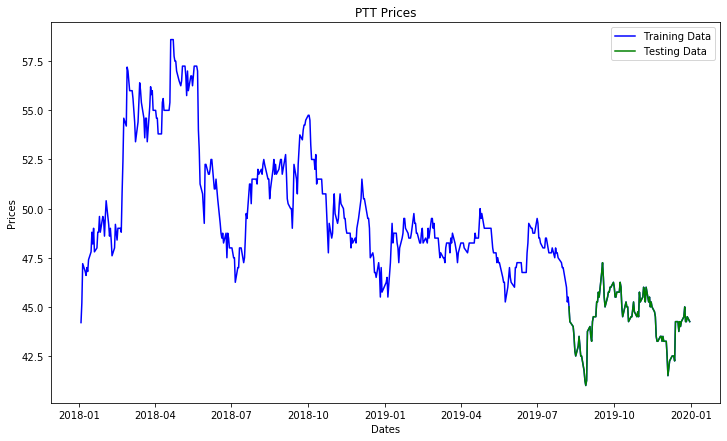

In [13]:
train_data, test_data = stock[0:int(len(stock)*0.8)], stock[int(len(stock)*0.8):]
plt.figure(figsize=(12,7))
plt.title('PTT Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(stock['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
#plt.xticks(np.arange(0,1073, 300), stock['Date'][0:1073:300]) ---> Also BLUG
plt.legend()


In [14]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [15]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.350
Symmetric mean absolute percentage error: 3.361


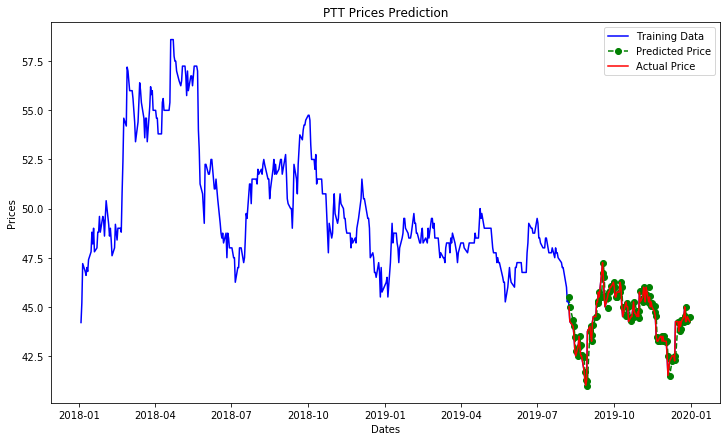

In [16]:
plt.figure(figsize=(12,7))
plt.plot(stock['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('PTT Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
#plt.xticks(np.arange(0,1073, 300), stock['Date'][0:1073:300])
plt.legend()

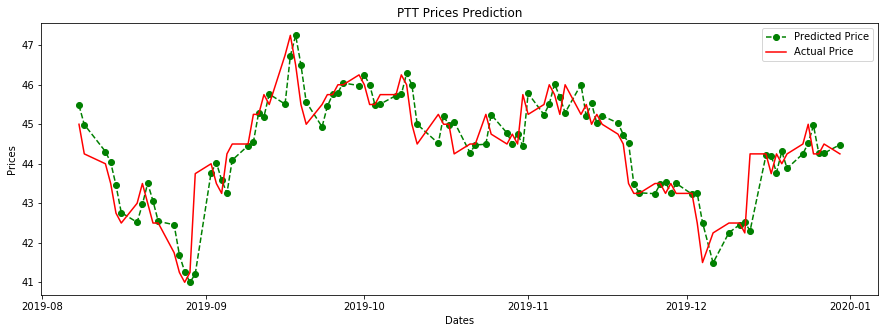

In [18]:
plt.figure(figsize=(15,5))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
#plt.xticks(np.arange(1486,1856, 60), stock['Date'][1486:1856:60])
plt.title('PTT Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()